## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

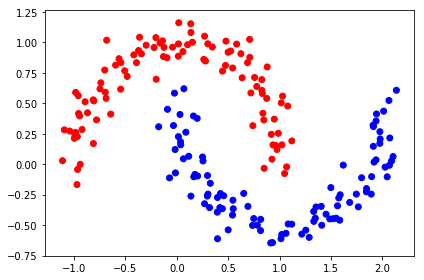

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

np.random.seed(22)

X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [4]:
# Relevant imports
from tensorflow.keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from tensorflow.keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

In [5]:
# Let's first create neural network with 1 layer 
# To add a layer to the architecture, you would simply use .add(LAYER).
# Each "input_dim" of each layer should be the number units in the previous layer 
# (in this case the input), and the number of "units" should be the number of 
# outputs of the layer (in this case it will be 1).


# Write your code here: (2 lines)
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=2))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [6]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

In [7]:
# Now we train the built perceptron
# Write your code here: (1 line)

perceptron.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)

In [8]:
from utils import get_accuracy

In [9]:
# And test it on training and test set 
get_accuracy(perceptron, X_test, y_test)

0.825

Text(12.375,0.5,'Test')

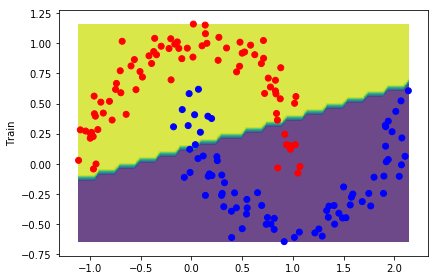

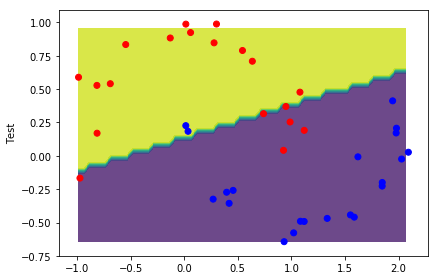

In [10]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the first exercise, use Keras to create a 2 layer neural network by completing build_one_output_model() in exercise_3.py. Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [11]:
from exercise_3 import build_one_output_model
model_2 = build_one_output_model()

In [12]:
model_2.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
get_accuracy(model_2, X_test, y_test)

0.875

Text(12.375,0.5,'Test')

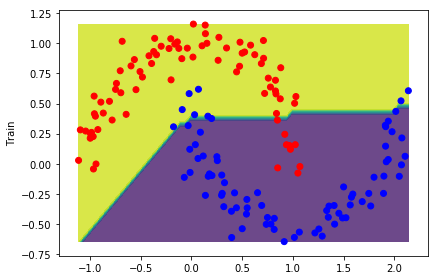

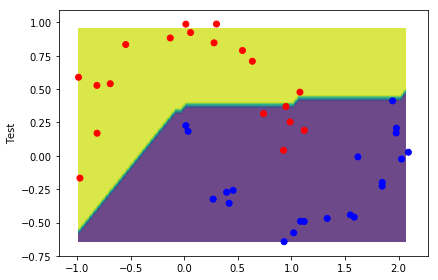

In [13]:
# And visualize how your model did
f, ax = visualize_2d_classification(model_2, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model_2, X_test, y_test)
ax.set_ylabel("Test")

It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [14]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [15]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Implement build_classification_model() in exercise_3.py that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [16]:
from exercise_3 import build_classification_model

In [17]:
model_3 = build_classification_model()

Use the below calls to test your implementation

In [18]:
model_3.fit(X_train, y_train_vectorized, epochs=1500, batch_size=10, verbose = 1)

Train on 160 samples
Epoch 1/1500
160/160 [==============================] - 0s 1ms/sample - loss: 0.7891 - accuracy: 0.2375
Epoch 2/1500
160/160 [==============================] - 0s 98us/sample - loss: 0.7316 - accuracy: 0.1813
Epoch 3/1500
160/160 [==============================] - 0s 94us/sample - loss: 0.6899 - accuracy: 0.4000
Epoch 4/1500
160/160 [==============================] - 0s 81us/sample - loss: 0.6691 - accuracy: 0.5750
Epoch 5/1500
160/160 [==============================] - 0s 84us/sample - loss: 0.6507 - accuracy: 0.5813
Epoch 6/1500
160/160 [==============================] - 0s 84us/sample - loss: 0.6304 - accuracy: 0.5875
Epoch 7/1500
160/160 [==============================] - 0s 84us/sample - loss: 0.6075 - accuracy: 0.6000
Epoch 8/1500
160/160 [==============================] - 0s 82us/sample - loss: 0.5858 - accuracy: 0.6687
Epoch 9/1500
160/160 [==============================] - 0s 82us/sample - loss: 0.5635 - accuracy: 0.7625
Epoch 10/1500
160/160 [============

In [19]:
get_accuracy(model_3, X_test, y_test)

1.0

Text(12.375,0.5,'Test')

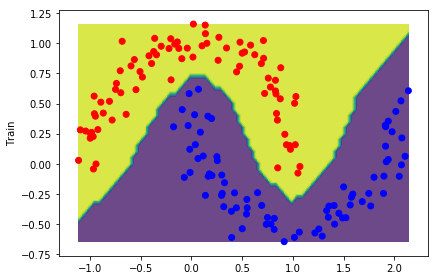

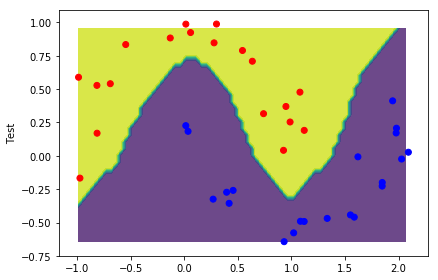

In [20]:
# And visualize how your model did
f, ax = visualize_2d_classification(model_3, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model_3, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:

Now let's revisit the classification problem in Homework2. Build a neural network to predict the output in the banking marketing dataset. The architecture choice is up to you, but you are required to  use Dense layers only.
features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function in exercise_3.py and use the below functions to train/test your code. 

In [21]:
from exercise_3 import build_final_model

In [22]:
# Read the data

X = pd.read_excel("features_ex2.xlsx")
y = pd.read_excel("label_ex2.xlsx")

# Converting strings to binary variables
mapping = {'yes': 1, 'no': 0}
y.y = [mapping[i] for i in y.y]

# Convert categorical variables into one-hot encodings(including the output variable consisting of "yes" or "no")

y_vectorized = to_categorical(y)


# Split data into train, validation and test set (70:15:15 ratio)

y_train = y.iloc[0:3165,:].copy()
y_cv = y.iloc[3165:3843,:].copy()

y_train_cat = y_vectorized[0:3165,:]
y_cv_cat = y_vectorized[3165:3843,:]

X_train = X.iloc[0:3165,:].copy()
X_cv = X.iloc[3165:3843,:].copy()
X_test= X.iloc[3843:4521,:].copy()

# Apply standardization to continuous values 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

continuous_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
string_variables = ['job', 'marital','education','default','housing','loan','contact','month','poutcome']

X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])
X_cv[continuous_variables] = scaler.transform(X_cv[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

# Converting strings to numeric variables

X_train_new = X_train[continuous_variables]
one_hot = pd.get_dummies(X_train[string_variables])
X_train_new = pd.concat([X_train_new,one_hot],axis=1)

X_cv_new = X_cv[continuous_variables]
one_hot = pd.get_dummies(X_cv[string_variables])
X_cv_new = pd.concat([X_cv_new,one_hot],axis=1)

X_test_new = X_test[continuous_variables]
one_hot = pd.get_dummies(X_test[string_variables])
X_test_new = pd.concat([X_test_new,one_hot],axis=1)

In [23]:
model_4 = build_final_model()

In [24]:
# fit the model
# obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

In [25]:
history = model_4.fit(X_train_new.values, y_train_cat, epochs=100, batch_size=32, verbose = 1, \
                     validation_data=(X_cv_new.values, y_cv_cat))

Train on 3165 samples, validate on 678 samples
Epoch 1/100
3165/3165 [==============================] - 1s 164us/sample - loss: 0.4206 - accuracy: 0.8758 - val_loss: 0.3593 - val_accuracy: 0.8938
Epoch 2/100
3165/3165 [==============================] - 0s 34us/sample - loss: 0.3703 - accuracy: 0.8844 - val_loss: 0.3456 - val_accuracy: 0.8938
Epoch 3/100
3165/3165 [==============================] - 0s 33us/sample - loss: 0.3648 - accuracy: 0.8844 - val_loss: 0.3366 - val_accuracy: 0.8938
Epoch 4/100
3165/3165 [==============================] - 0s 34us/sample - loss: 0.3567 - accuracy: 0.8844 - val_loss: 0.3304 - val_accuracy: 0.8938
Epoch 5/100
3165/3165 [==============================] - 0s 34us/sample - loss: 0.3570 - accuracy: 0.8844 - val_loss: 0.3245 - val_accuracy: 0.8938
Epoch 6/100
3165/3165 [==============================] - 0s 33us/sample - loss: 0.3493 - accuracy: 0.8844 - val_loss: 0.3206 - val_accuracy: 0.8938
Epoch 7/100
3165/3165 [==============================] - 0s 33us

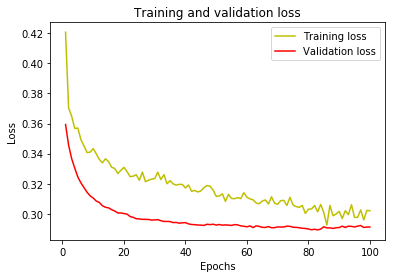

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

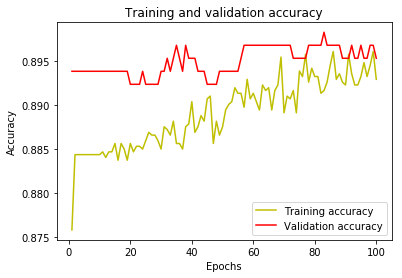

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
y_cv_pred_nn = model_4.predict(X_cv_new.values)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [30]:
acc_nn = accuracy_score(y_cv.values.ravel(), np.round(y_cv_pred_nn[:,1]))
prec_nn = precision_score(y_cv.values.ravel(), np.round(y_cv_pred_nn[:,1]))
rec_nn = recall_score(y_cv.values.ravel(), np.round(y_cv_pred_nn[:,1]))
f1_nn = f1_score(y_cv.values.ravel(), np.round(y_cv_pred_nn[:,1]))

print(f'{"Accuracy":<9}')
print(f'{round(acc_nn,3):<9}')

print(f'\n{"Precision":<9}')
print(f'{round(prec_nn,3):<9}')    

print(f'\n{"Recall":<9}')
print(f'{round(rec_nn,3):<9}')

print(f'\n{"F1-Score":<9}')
print(f'{round(f1_nn,3):<9}')

Accuracy 
0.895    

Precision
0.526    

Recall   
0.139    

F1-Score 
0.22     


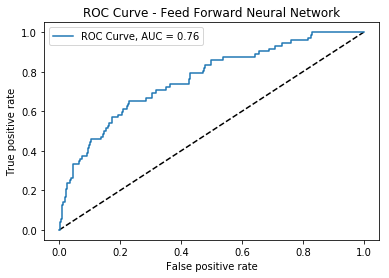

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_cv.values, model_4.predict_proba(X_cv_new.values)[:,1])
auc_nn = roc_auc_score(y_cv.values, model_4.predict_proba(X_cv_new.values)[:,1])

# Plot the ROC curve by giving appropriate names for title and axes. 

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc_nn,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve - Feed Forward Neural Network')
plt.legend(loc='best')
plt.show()

In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models.

In [32]:
from exercise_3 import logistic_regression_model

In [33]:
model_5 = logistic_regression_model()

In [34]:
# fit the model
# obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

model_5.fit(X_train_new.values, y_train.values.ravel())
print('Best Penalty:', model_5.best_estimator_.get_params()['penalty'])
print('Best C:', model_5.best_estimator_.get_params()['C'])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ................................ C=0.1, penalty=l1, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=0.2, penalty=l1 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.30000000000000004, penalty=l1, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1 ...............................
[CV] ................ C=0.30000000000000004, penalty=l1, total=   0.0s
[CV] C=0.30000000000000004, penalty=l1 ...............................
[CV] ................ C=0.30000000000000004, penalty=l1, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2 ...............................
[CV] ................ C=0.30000000000000004, penalty=l2, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2 ...............................
[CV] ................ C=0.30000000000000004, penalty=l2, total=   0.0s
[CV] C=0.30000000000000004, penalty=l2 ...............................
[CV] ................ C=0.30000000000000004, penalty=l2, total=   0.0s
[CV] C=0.4, penalty=l1 ...............................................
[CV] ................................ C=0.4, penalty=l1, total=   0.0s
[CV] C=0.4, penalty=l1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.0s finished


In [35]:
y_cv_pred_lg = model_5.predict(X_cv_new.values)

In [36]:
acc_lg = accuracy_score(y_cv.values.ravel(), y_cv_pred_lg)
prec_lg = precision_score(y_cv.values.ravel(), y_cv_pred_lg)
rec_lg = recall_score(y_cv.values.ravel(), y_cv_pred_lg)
f1_lg = f1_score(y_cv.values.ravel(), y_cv_pred_lg)

print(f'{"Accuracy":<9}')
print(f'{round(acc_lg,3):<9}')

print(f'\n{"Precision":<9}')
print(f'{round(prec_lg,3):<9}')    

print(f'\n{"Recall":<9}')
print(f'{round(rec_lg,3):<9}')

print(f'\n{"F1-Score":<9}')
print(f'{round(f1_lg,3):<9}')

Accuracy 
0.892    

Precision
0.476    

Recall   
0.139    

F1-Score 
0.215    


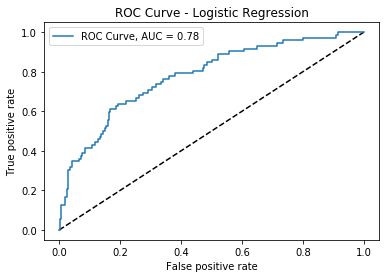

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_cv.values, model_5.predict_proba(X_cv_new.values)[:,1])
auc_lg = roc_auc_score(y_cv.values, model_5.predict_proba(X_cv_new.values)[:,1])

# Plot the ROC curve by giving appropriate names for title and axes. 

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc_lg,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='best')
plt.show()

In [38]:
from exercise_3 import random_forest_model

In [39]:
model_6 = random_forest_model()

In [40]:
model_6.fit(X_train_new.values, y_train.values.ravel())

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:   54.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=26,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'ma

In [41]:
model_6.best_params_

{'max_depth': 30,
 'max_features': 35,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [42]:
# fit the model
# obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

In [43]:
y_cv_pred_rf = model_6.predict(X_cv_new.values)

In [44]:
acc_rf = accuracy_score(y_cv.values.ravel(), y_cv_pred_rf)
prec_rf = precision_score(y_cv.values.ravel(), y_cv_pred_rf)
rec_rf = recall_score(y_cv.values.ravel(), y_cv_pred_rf)
f1_rf = f1_score(y_cv.values.ravel(), y_cv_pred_rf)

print(f'{"Accuracy":<9}')
print(f'{round(acc_rf,3):<9}')

print(f'\n{"Precision":<9}')
print(f'{round(prec_rf,3):<9}')    

print(f'\n{"Recall":<9}')
print(f'{round(rec_rf,3):<9}')

print(f'\n{"F1-Score":<9}')
print(f'{round(f1_rf,3):<9}')

Accuracy 
0.903    

Precision
0.588    

Recall   
0.278    

F1-Score 
0.377    


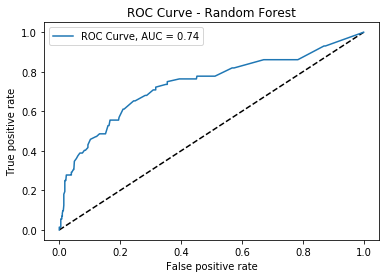

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_cv.values, model_6.predict_proba(X_cv_new.values)[:,1])
auc_rf = roc_auc_score(y_cv.values, model_6.predict_proba(X_cv_new.values)[:,1])

# Plot the ROC curve by giving appropriate names for title and axes. 

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AUC = {round(auc_rf,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.show()

In [46]:
print("Metrics Comparison for all models\n")

print(f'{"Accuracy":>20} | {"Precision":<9} | {"Recall":<6} | {"F1-Score":<9} | {"AUC":<5} |\n')
print(f'{"FNNN":<11} {np.round(acc_nn,3):<9}| {np.round(prec_nn,3):<9} | {np.round(rec_nn,3):<6} | {np.round(f1_nn,3):<9} | {np.round(auc_nn,3)} |')
print(f'{"Log Regr":<11} {np.round(acc_lg,3):<9}| {np.round(prec_lg,3):<9} | {np.round(rec_lg,3):<6} | {np.round(f1_lg,3):<9} | {np.round(auc_lg,3)} |')
print(f'{"Rand For":<11} {np.round(acc_rf,3):<9}| {np.round(prec_rf,3):<9} | {np.round(rec_rf,3):<6} | {np.round(f1_rf,3):<9} | {np.round(auc_rf,3)} |')

Metrics Comparison for all models

            Accuracy | Precision | Recall | F1-Score  | AUC   |

FNNN        0.895    | 0.526     | 0.139  | 0.22      | 0.762 |
Log Regr    0.892    | 0.476     | 0.139  | 0.215     | 0.778 |
Rand For    0.903    | 0.588     | 0.278  | 0.377     | 0.737 |


Which of the above 3 models worked best for you? Explain the reason for good/bad performance for each of the models.

**Random forest delivered best Accuracy, Precision, Recall and F1-Score metrics, while having AUROC just 3-4% lower than FNNN and Logistic Regression - so we'll stop on that model**

1) We can encounter problems when using **logistic regression**, because the response in our dataset may not be linearly related to features.

2) **Neural Networks** are black-boxes of various layers, and it takes a lot of effort to find the best layer configuration. Probably it would work better if we had more time to try. However, we don't understand the obtained model (thanks to its black-box nature) and it's computationally expensive.

3) **Random Forest** is just in the sweet spot between being complexity and simplicity and suits our task in the best way. It's easy to tune and the logic behind it is clear.

Using the best of the above 3 models, obtain predictions for the test set. Submit these predictions in a csv. 

In [47]:
predicted = model_6.predict(X_test_new.values)

# Converting binary variables back to strings 
mapping = {1: 'yes', 0:'no'}
predicted = [mapping[i] for i in predicted]

### save into csv with column heading as "y"
pred_df = pd.DataFrame(predicted, columns = ['y'])
pred_df.to_csv('result.csv',index = False)